In [123]:
from random import randint
def randhex():
    r = lambda: random.randint(0,255)
    return('#%02X%02X%02X' % (r(),r(),r()))

# cartopy  <small> Cartographic accuracy in Python </small>

`cartopy` is a Python package for the purpose of making accurate cartographic projections fun and easy. It is the successor to `basemap`, which is included in the `matplotlib` plotting package. `cartopy` is a more flexible and and easier-to-use package which integrates nicely into matplotlib visualizations. 



## Map Features + Shapes
Taking a cue from `matplotlib`'s `basemap`, `cartopy` includes utilities for constructing a map upon which some geospatial data can be plot. Before diving into projections we'll start by taking a look at what's available there. 

The `shapereader` class is used for reading shapefiles. It comes pre-packaged with a downloader/reader of the [Natural Earth](http://www.naturalearthdata.com/) dataset, an extensive set of free vector and raster map features. There are two ways to access this NaturalEarth data: as a raw shapefile, and as a `cartopy` `Feature` object. We'll start with the raw shapefile. 

In [75]:
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shapereader
_DEFAULT_PROJECTION = ccrs.Mercator().GOOGLE

Once we've loaded the `shapereader` class from the `cartopy.io` module, we can use the `natural_earth` function to access the shapefiles. 

In [109]:
shapename = 'admin_1_states_provinces_lakes_shp' # specified at http://naturalearthdata.com

# Download (or find locally) the shapefile.
states_shp = shapereader.natural_earth(resolution='50m',
                                       category='cultural',
                                       name=shapename)

states_shp

/opt/anaconda/lib/python3.6/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lakes_shp.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


'/home/acannistra/.local/share/cartopy/shapefiles/natural_earth/cultural/50m_admin_1_states_provinces_lakes_shp.shp'

To plot the polygons inside this shapefile, we set up a basic matplotlib figure:

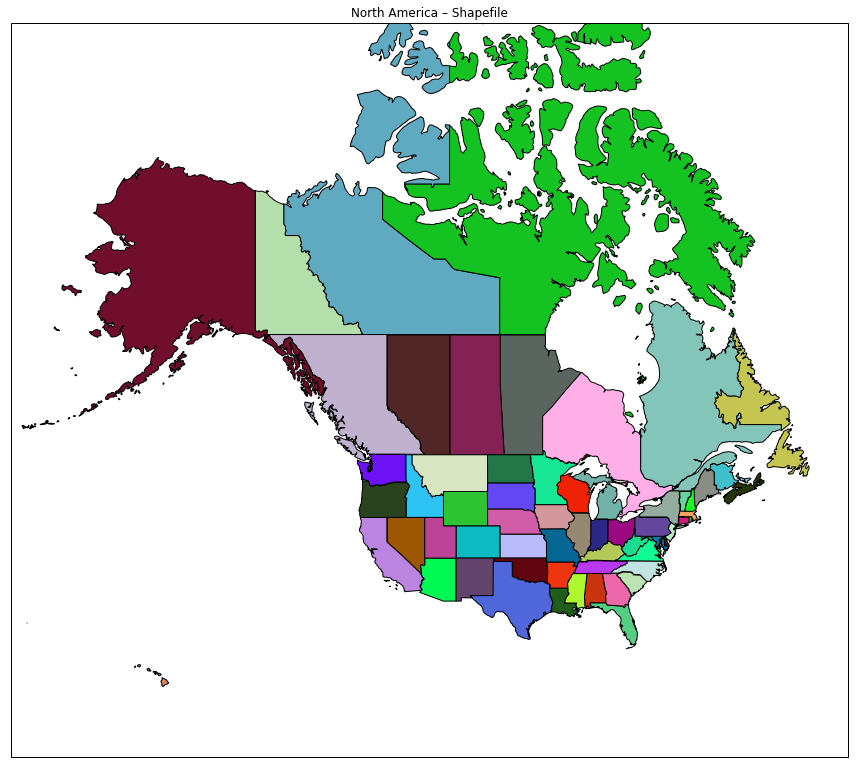

In [130]:
fig = plt.figure(figsize=(15, 15)) 
ax = plt.axes(projection=_DEFAULT_PROJECTION)
ax.set_extent([-180, -46.5, 8, 60], ccrs.Geodetic()) # North America, in Geodetic CRS
ax.set_title("North America – Shapefile")
for state in shapereader.Reader(states_shp).geometries(): # plot each geometry with different color. 
    ax.add_geometries(state, ccrs.PlateCarree(), facecolor=randhex(), edgecolor='black')

Because we downloaded the raw `'admin_1_states_provinces_lakes_shp'` shapefile from Natural Earth, we can iterate through all of the geometries and specify visualization information for each (see the `facecolor` and `edgecolor` arguments to `add_geometries`, above). 

The `shapereader.Reader` module can read any shapefile. 

If we don't need this level of granularity in our visualization, `cartopy` has a module which does much of the heavy-lifting for us: the `feature` module. Here we'll make the same plot as above, but using a different method. 

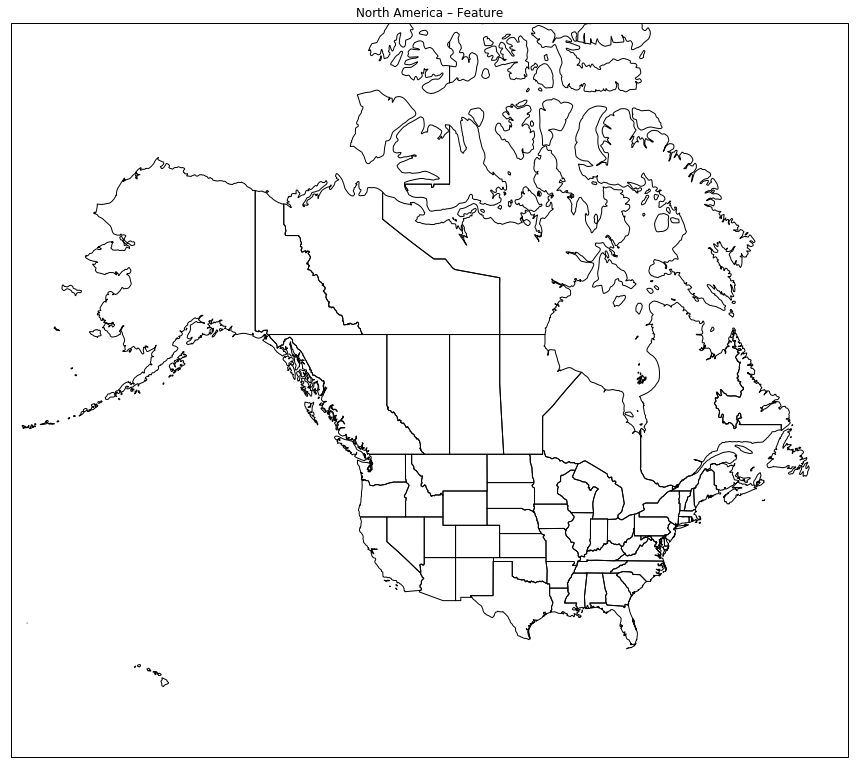

In [133]:
import cartopy.feature as feature

states_feature = feature.NaturalEarthFeature(category='cultural',
                                             name='admin_1_states_provinces_shp', 
                                             scale='50m',
                                             facecolor='none', 
                                            edgecolor='black')

fig = plt.figure(figsize=(15, 15)) 
ax = plt.axes(projection=_DEFAULT_PROJECTION)
ax.set_extent([-180, -46.5, 8, 60], ccrs.Geodetic()) # North America, in Geodetic CRS
ax.set_title("North America – Feature")
ax.add_feature(states_feature)

As you can see, this plot is equivalent. However, I can't add individual color to each state/province like I can with the shapefile method: it's either all one color, or all `'none`', as I've set above. 

There's also `cartopy.feature.BORDERS`, `cartopy.feature.COASTLINE`, `cartopy.feature.LAKES`, `cartopy.feature.LAND`, `cartopy.feature.OCEAN`, and `cartopy.feature.RIVERS` for even easier basemap creation (all data is from NaturalEarth). 

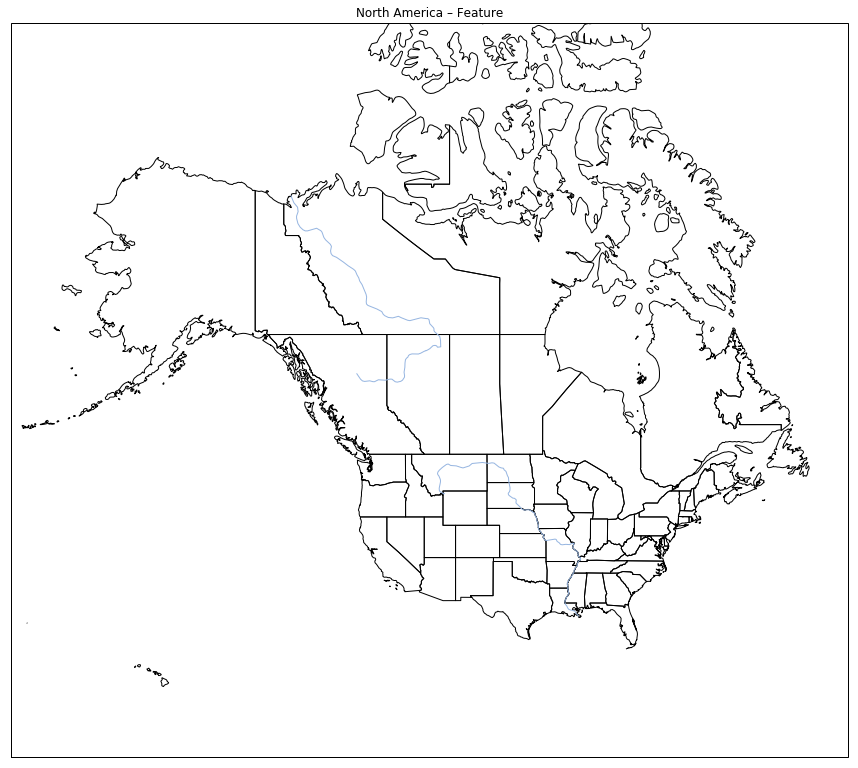

In [151]:
fig = plt.figure(figsize=(15, 15)) 
ax = plt.axes(projection=_DEFAULT_PROJECTION)
ax.set_extent([-180, -46.5, 8, 60], ccrs.Geodetic()) # North America, in Geodetic CRS
ax.set_title("North America – Feature")
ax.add_feature(states_feature)
ax.add_feature(feature.RIVERS)

## Pre-Defined Projections
Cartopy comes pre-loaded with lots of projections. You can see them all [here](http://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html). We'll play around with a couple of them, just for fun. Let's remake the above plots with the new projection. 

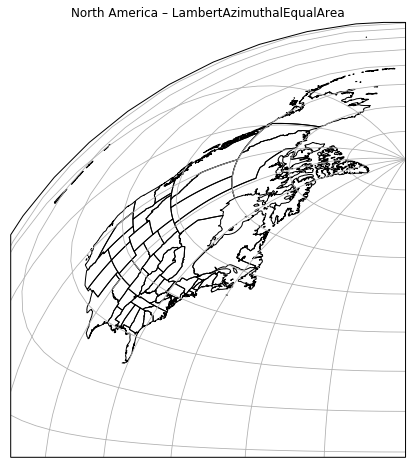

In [139]:
fig = plt.figure(figsize=(8, 8)) 
ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea())
ax.set_extent([-180, -46.5, 8, 60], ccrs.Geodetic()) # North America, in Geodetic CRS
ax.set_title("North America – LambertAzimuthalEqualArea")
ax.add_feature(states_feature)
ax.gridlines()

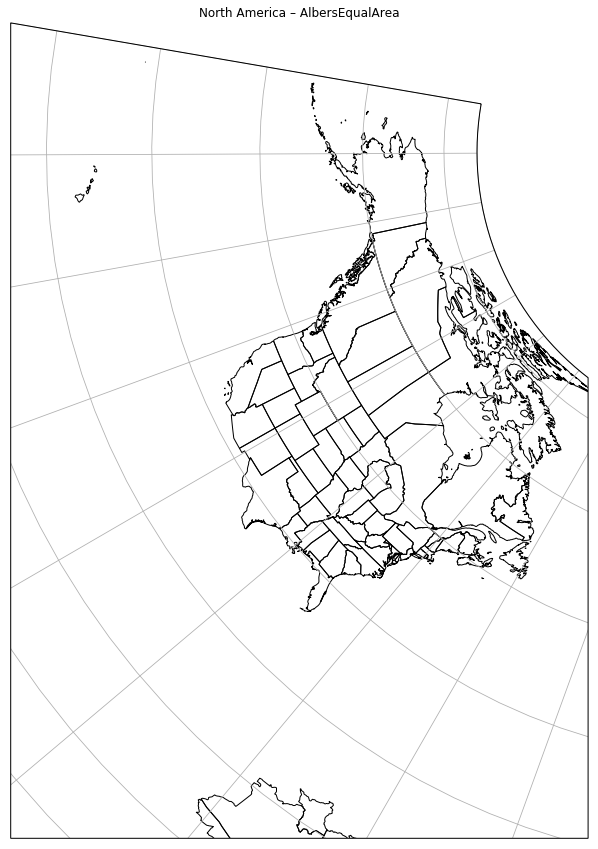

In [142]:
fig = plt.figure(figsize=(15, 15)) 
ax = plt.axes(projection=ccrs.AlbersEqualArea())
ax.set_extent([-180, -46.5, 8, 60], ccrs.Geodetic()) # North America, in Geodetic CRS
ax.set_title("North America – AlbersEqualArea")
ax.add_feature(states_feature)
ax.gridlines()

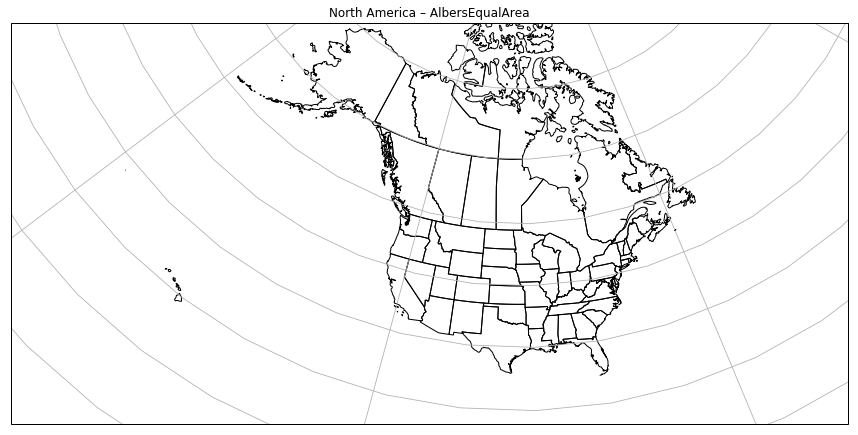

In [143]:
fig = plt.figure(figsize=(15, 15)) 
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-180, -46.5, 8, 60], ccrs.Geodetic()) # North America, in Geodetic CRS
ax.set_title("North America – LambertConformal")
ax.add_feature(states_feature)
ax.gridlines()

## Plotting Data